## linear regression code along

- Tv, radio, newspaper spending 

In [42]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv("Advertising.csv", index_col=0)

df.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [41]:
train_test_split()

NameError: name 'train_test_split' is not defined

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 7.8 KB


In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


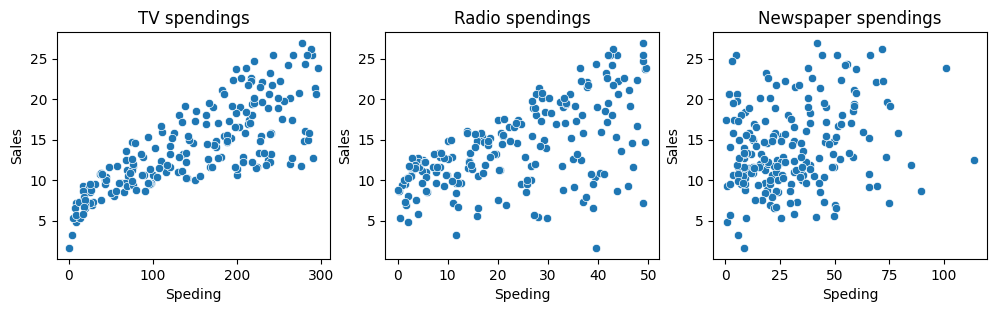

In [19]:
fig, ax = plt.subplots(1,3,figsize=(12,3), dpi=100)

for i, feature in enumerate(df.columns[:-1]):
    sns.scatterplot(data=df, x = feature, y = "Sales", ax = ax[i])
    ax[i].set(xlabel = "Speding", title=f"{feature} spendings")

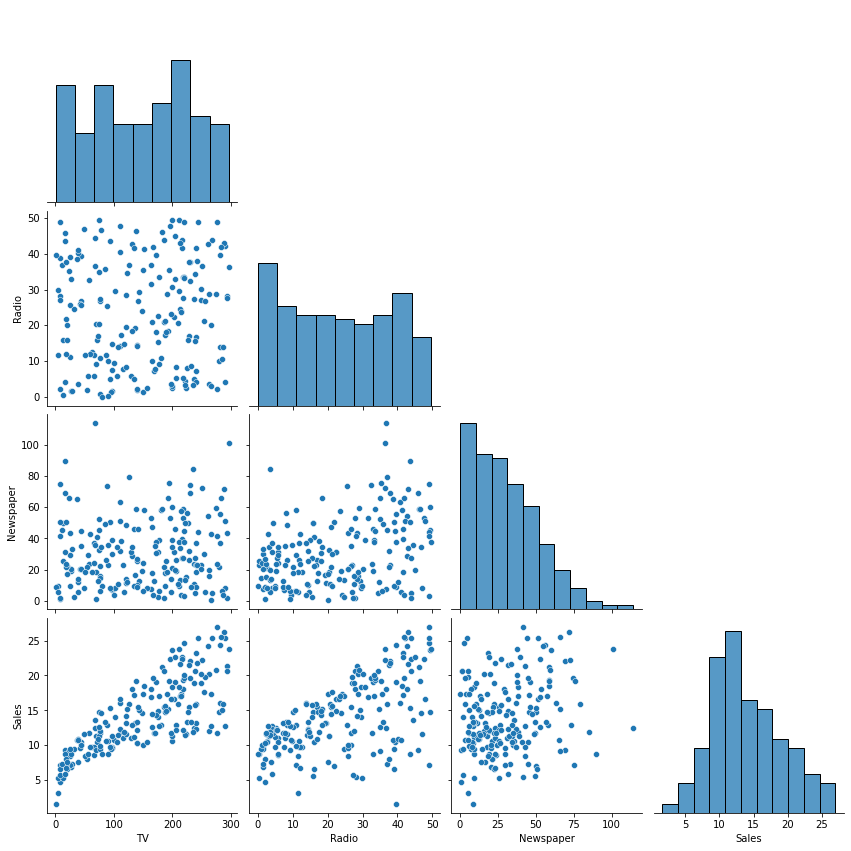

In [21]:
ax = sns.pairplot(df, corner=True, height=3)

<AxesSubplot:xlabel='TV', ylabel='Sales'>

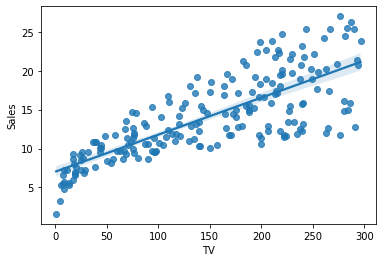

In [23]:
X, y = df["TV"], df["Sales"]
sns.regplot(x=X, y=y)

Intercept beta_0 hat: 7.0326
Slope beta_1 hat: 0.0475


[Text(0.5, 1.0, 'TV advertisement linear regression'),
 Text(0.5, 0, 'Thousands dollars'),
 Text(0, 0.5, 'Sales thousands units')]

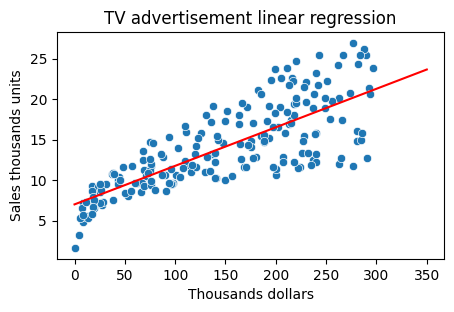

In [24]:
X, y = df["TV"], df["Sales"]
# fits a polynomial of degree deg using least squares polynomial fit


beta_1, beta_0 = np.polyfit(X, y, deg=1)  # returns coefficient with highest power first


# predicted y, note that beta_0 and beta_1 are actually beta_0, beta_1 hats as they are sample estimates
y_hat = lambda x: beta_0 + beta_1 * x


print(f"Intercept beta_0 hat: {beta_0:.4f}")
print(f"Slope beta_1 hat: {beta_1:.4f}")  # spend $1000 gives 47.5 extra sold units

spend = np.linspace(0, 350) # 随机生成数据用于检验beta

fig, ax = plt.figure(figsize=(5, 3), dpi=100), plt.axes()

sns.scatterplot(data=df, x="TV", y="Sales")
sns.lineplot(x=spend, y=y_hat(spend), color="red")

ax.set(
    title="TV advertisement linear regression",
    xlabel="Thousands dollars",
    ylabel="Sales thousands units",
)

## Multiple linear regression

We used numpy polyfit to estimate 
 from the TV-feature alone. polyfit requires 1D vector, but we want to use all the features (TV, radio, newspaper) for prediction, i.e. we want to use more explanatory variables. One way is to manually solve the normal equation or the closed form equation: 
 as we did linear algebra course, but now we add more features which is simply more columns.

In [25]:
X, y = df.drop("Sales", axis="columns"), df["Sales"]
X.insert(0, "Intercept", 1) # 加入intercept 1

# normal equation, note that we use pinv, which stands for pseudoinverse instead of inverse, which
# uses something called SVD - Singular Value Decomposition. This gives computational complexity of O(n^2) instead of O(n^3)
regression_fit = lambda X, y: np.linalg.pinv(X.T @ X) @ X.T @ y
beta_hat = regression_fit(X, y)

predict = lambda x, beta: np.dot(x, beta) # np dot --- 数组或者矩阵的内积或者相乘

# note that we add 1 to account for the intercept
test_sample = [1, 230.1, 37.8, 69.2]

y_hat = predict(test_sample, beta_hat)

# we have taken first sample from the data to see if predicted sales come close to the label 22.1, for controlling.
# note that we actually should not use a sample from the training data for testing because of data leakage
print(
    f"TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts {y_hat:.1f} thousand units"
)

TV: $230.1k, Radio: $37.8k, Newspaper: $69.2k predicts 20.5 thousand units


## Train-test split
So how well did the model perform? There are several evaluation metrics that we can use to answer this question but not on the training data. Using training data for evaluation we have data leakage, because at prediction time we shouldn't have this data available. Data leakage will lead to overestimation of the performance as the model has already trained on the data it is using for evaluation.

We split the data into a training set and a test set, where the test set will only be used during evaluation of the model. Practically we randomly sample this dataset without replacement with certain size for training set and the rest for testing.

In [27]:
# split 70% training and 30% test
train_fraction = int(len(df) * 0.7)

train = df.sample(n=train_fraction, random_state=42, replace=False) # 从整体数据中抽取n个（train fraction）不放回
test = df.drop(
    train.index
)  # the rest of the data is the test set as we sampled without replacement


X_train, y_train = (
    train.drop("Sales", axis="columns"),  # 除了sale之外的列
    train["Sales"],     # 只保留sale
)

X_test, y_test = test.drop("Sales", axis="columns"), test["Sales"] # test数据中同样的选取

# adding intercept column with ones
X_train.insert(0, "Intercept", 1)
X_test.insert(0, "Intercept", 1)

# checking shapes of the train|test split datasets
for dataset in ["X_train", "X_test", "y_train", "y_test"]:
    print(f"Shape of {dataset}: {eval(dataset).shape}")

Shape of X_train: (140, 4)
Shape of X_test: (60, 4)
Shape of y_train: (140,)
Shape of y_test: (60,)


## Prediction
Important to check dimensions in order for matrix multiplications to work properly

##### //Note that we train on the training set and predict on the test set. 

In [38]:
# training - we fit the weights beta_hat to the training data
beta_hat = regression_fit(X_train, y_train)
print(f"Regression coefficients beta: {beta_hat.values}")

# we generalize the predict to work for matrix with many samples
predict = lambda X, weights: X @ weights

# note that X_test shape is (60, 1) and beta_hat shape needs to be (4,1)
y_hat = predict(X_test.to_numpy(), np.reshape(beta_hat.to_numpy(), (4, 1)))

print(f"Shape of y_hat is {y_hat.shape}, i.e. prediction for each sample in test set")

print(f"TV, Radio, Newspaper spending of {X_test.iloc[0].values[1:]} gives prediction of {y_hat[0][0]:.1f} thousand units")
print(f"The true sale label is y = {y_test.iloc[0]} thousand units")

Regression coefficients beta: [ 2.95609427  0.04679253  0.18706314 -0.00480492]
Shape of y_hat is (60, 1), i.e. prediction for each sample in test set
TV, Radio, Newspaper spending of [44.5 39.3 45.1] gives prediction of 12.2 thousand units
The true sale label is y = 10.4 thousand units
